In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## Limpieza y Análisis de Datos

In [39]:
data_fifa19=pd.read_csv("fifadata.csv", decimal=",")
data_fifa19.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [65]:
data_fifa19["Value"]

0        €110.5M
1           €77M
2        €118.5M
3           €72M
4          €102M
          ...   
18202       €60K
18203       €60K
18204       €60K
18205       €60K
18206       €60K
Name: Value, Length: 18207, dtype: object

Genearamos una copia de los datos, por si podemos errar en su procesamiento o la persona que nos lo facilito 
pueda hacer uso de ellos para otro tipo de análisis

In [40]:
data_fifa19_1=data_fifa19.copy()
data_fifa19_1

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


Al revisar los datos, encontramos atributos con direcciones o links, y especificacion de posciones que no aportarian a nuestro objetivo. Por lo tanto las eliminaremos

In [41]:
data_fifa19_1.drop(['Unnamed: 0','Photo','Flag','Club Logo','LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'], axis=1, inplace=True)

In [42]:
data_fifa19_1

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,1307,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,1098,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,241638,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,1189,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,€1K,1228,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


después revisamos el valor de nulos en el dataset, y ver cual es la mejor opcion, si eliminarlos, llenarlos con la media o 0

In [46]:
data_fifa19_1.isnull().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys                        48
Dribbling     

Encontramos atributos con datos por encima del valor permitible(20% del total de los datos), por lo tanto no son relevantes ya que no aportan, por ende son eliminados

In [48]:
data_fifa19_1.drop(['Loaned From', 'Joined', 'Release Clause'], axis=1, inplace=True)

In [49]:
data_fifa19_1.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

Inicialmente vemos que los datos de interes como Value y Waste, estan acompañados por simbologia monetaria. Tenemos que dejarlos puramente numeros para poder realizar los respectivos análisis

In [51]:
#Limpieza de simbolos en Value and Wage para el analisis de datos
def val_to_real(val):
    try:
        value = float(val[1:-1])
        suff_value=val[-1:]
        if(suff_value=='M'):
            value=value*1000000
        elif(suff_value=='K'):
            value=value*1000
    except ValueError:
        value=0
    return value

data_fifa19_1["Value"]=data_fifa19_1["Value"].apply(val_to_real)
data_fifa19_1["Wage"]=data_fifa19_1["Wage"].apply(val_to_real)

Ahora podemos hacer su estadistica correspondiente

In [67]:
#d=data_fifa19_1.sort_values(ascending=False, by="Value")
#d[["Name","Value","Wage"]]
data_fifa19_1["Value"].describe()

count    1.820700e+04
mean     2.410696e+06
std      5.594933e+06
min      0.000000e+00
25%      3.000000e+05
50%      6.750000e+05
75%      2.000000e+06
max      1.185000e+08
Name: Value, dtype: float64

In [69]:
m=data_fifa19_1.sort_values(ascending=False, by="Wage")
m[['Name','Value',"Wage","Overall","Age","Potential",'International Reputation']]

,Name,Value,Wage,Overall,Age,Potential,International Reputation
0,L. Messi,110500000.0,565000.0,94,31,94,5.0
7,L. Suárez,80000000.0,455000.0,91,31,91,5.0
6,L. Modrić,67000000.0,420000.0,91,32,91,4.0
1,Cristiano Ronaldo,77000000.0,405000.0,94,33,94,5.0
8,Sergio Ramos,51000000.0,380000.0,91,32,91,4.0
...,...,...,...,...,...,...,...
5614,A. Fathi,0.0,0.0,70,33,70,2.0
14786,U. Singh,0.0,0.0,60,22,67,1.0
3170,S. Ingason,0.0,0.0,73,24,78,1.0
5595,D. Böde,0.0,0.0,70,31,70,1.0


In [70]:
data_fifa19_1["Wage"].describe()

count     18207.000000
mean       9731.312133
std       21999.290406
min           0.000000
25%        1000.000000
50%        3000.000000
75%        9000.000000
max      565000.000000
Name: Wage, dtype: float64

Anteriormente observamos que los nulls eran constante en las caracteristicas del jugador, si esto corresponde a los mismos index de cada caracteristica, podremos eliminarla sin preocupación de sesgar los datos.

In [123]:


arr_col_null_48=[]
for i in data_fifa19_1.columns:
    if data_fifa19_1[i].isnull().sum()==48:
        arr_col_null_48.append(i)
 

arr_null_weight=data_fifa19_1[data_fifa19_1["Weight"].isnull()].index.tolist()
arr_null_weight
for d in arr_col_null_48:
    temp=data_fifa19_1[data_fifa19_1[d].isnull()].index.tolist()
    if arr_null_weight == temp:
        print("They are same "+d)
    else:
        print("They're not same")
#data_fifa19_1["Weight"]=data_fifa19_1["Weight"].apply(val_lib_real)
#data_fifa19_1["Height2"]=data_fifa19_1["Height"].apply(val_feet_real)
#data_fifa19_1.info()
#val_lib_real(data_fifa19_1["Weight"][5])
#data_fifa19_1[["Weight","Height"]]

They are same Preferred Foot
They are same International Reputation
They are same Weak Foot
They are same Skill Moves
They are same Work Rate
They are same Body Type
They are same Real Face
They are same Height
They are same Weight
They are same Crossing
They are same Finishing
They are same HeadingAccuracy
They are same ShortPassing
They are same Volleys
They are same Dribbling
They are same Curve
They are same FKAccuracy
They are same LongPassing
They are same BallControl
They are same Acceleration
They are same SprintSpeed
They are same Agility
They are same Reactions
They are same Balance
They are same ShotPower
They are same Jumping
They are same Stamina
They are same Strength
They are same LongShots
They are same Aggression
They are same Interceptions
They are same Positioning
They are same Vision
They are same Penalties
They are same Composure
They are same Marking
They are same StandingTackle
They are same SlidingTackle
They are same GKDiving
They are same GKHandling
They are s

Comprobado ;)

In [127]:
data_fifa19_1.drop(data_fifa19_1.index[arr_null_weight], inplace=True)

Verificamos:

In [128]:
data_fifa19_1.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                         0
Wage                          0
Special                       0
Preferred Foot                0
International Reputation      0
Weak Foot                     0
Skill Moves                   0
Work Rate                     0
Body Type                     0
Real Face                     0
Position                     12
Jersey Number                12
Contract Valid Until        241
Height                        0
Weight                        0
Crossing                      0
Finishing                     0
HeadingAccuracy               0
ShortPassing                  0
Volleys                       0
Dribbling                     0
Curve                         0
FKAccuracy                    0
LongPassing                   0
BallCont

Hacemos lo mismo con Weight y Height, como con Value y Wage

In [135]:
def val_lib_real(val):
    try:
        value10=float(val[:-3])
    except ValueError:
        value10=0
    return value10

def val_feet_real(val):
    try:
        value1=float(val[0])*30.48
        value2=float(val[2:])*2.54
        valueT=value1+value2
    except ValueError:
        valueT=0
    return valueT

#data_fifa19_1["Weight"]=data_fifa19_1["Weight"].apply(val_lib_real)
data_fifa19_1["Height"]=data_fifa19_1["Height"].apply(val_feet_real)

In [136]:
data_fifa19_1[["Height","Weight"]]

,Height,Weight
0,170.18,159.0
1,187.96,183.0
2,175.26,150.0
3,193.04,168.0
4,180.34,154.0
...,...,...
18202,175.26,134.0
18203,190.50,170.0
18204,172.72,148.0
18205,177.80,154.0


In [152]:
index_null_jersey_number=data_fifa19_1[data_fifa19_1["Jersey Number"].isnull()].index.tolist()
index_null_position=data_fifa19_1[data_fifa19_1["Position"].isnull()].index.tolist()

if index_null_jersey_number==index_null_position:
    print("They are same")
else:
    print("They're not same")

They are same


Clasificamos las variables categoricas y cualitativas, para entender la relación con Value (nuestra variable objetivo)

In [155]:
var_col_category=[name for name in data_fifa19_1.columns if data_fifa19_1[name].dtype == 'object']
var_col_category

['Name',
 'Nationality',
 'Club',
 'Preferred Foot',
 'Work Rate',
 'Body Type',
 'Real Face',
 'Position',
 'Contract Valid Until']

In [160]:
var_col_numeric=[num for num in data_fifa19_1.columns if data_fifa19_1[num].dtype in ['int64', 'float64']]
var_col_numeric

['ID',
 'Age',
 'Overall',
 'Potential',
 'Value',
 'Wage',
 'Special',
 'International Reputation',
 'Weak Foot',
 'Skill Moves',
 'Jersey Number',
 'Height',
 'Weight',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes']

## Análisis de las Variables Cualitativas con respecto al valor del jugador

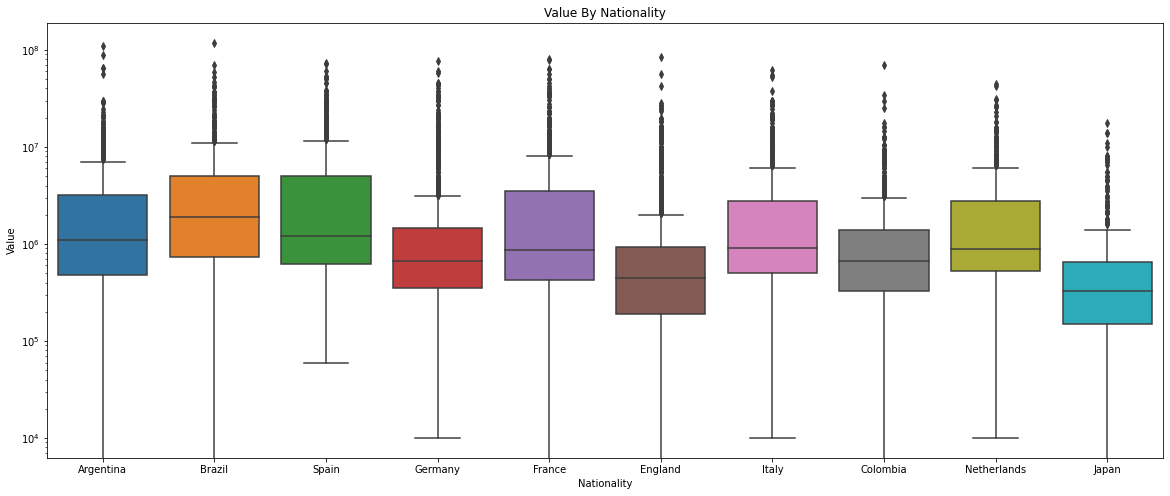

In [187]:
countries=data_fifa19_1.groupby('Nationality')["Value"].size().sort_values(ascending=False)[:10].reset_index()['Nationality']
#countries
plt.figure(figsize=(20,8))
graph1=sns.boxplot(y=data_fifa19_1[data_fifa19_1["Nationality"].isin(countries)]["Value"], x=data_fifa19_1[data_fifa19_1["Nationality"].isin(countries)]["Nationality"])
graph1.set(yscale="log", title="Value By Nationality");

Es importate el país donde provenga el jugador para su valor en el negocio del futbol, evidenciamos que liderando Brazil junto con España seguido de Argentina, Francia e Italia. Tienen presencia en los jugadores mas costosos. Esto puede ser un factor importante para los gerentes al definir el valor de un jugador.

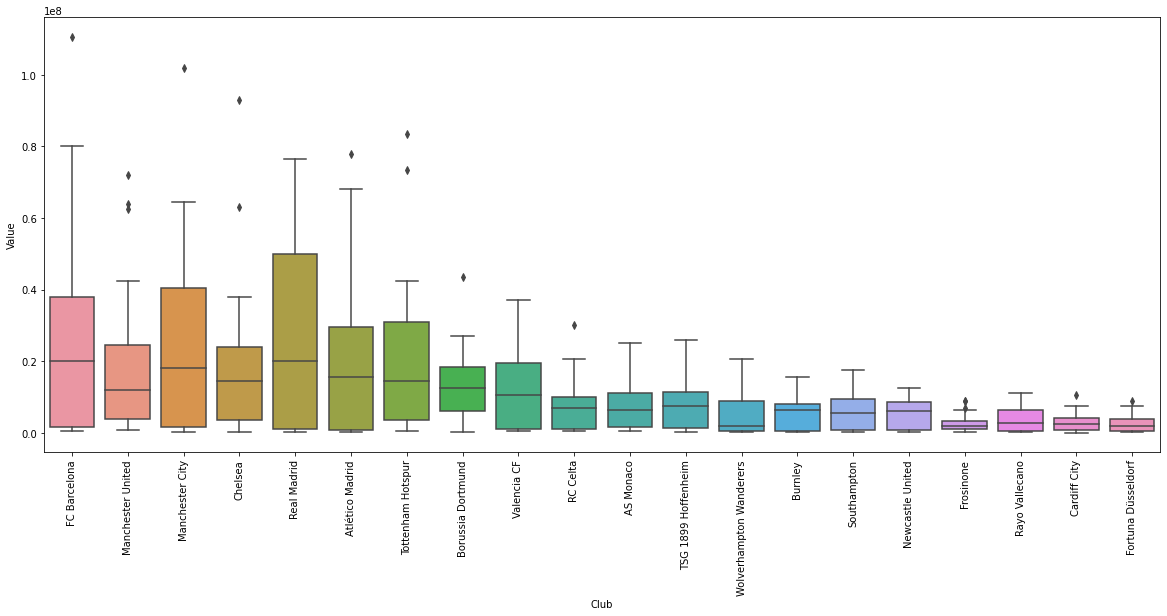

In [196]:
clubs_group=data_fifa19_1.groupby("Club")["Value"].size().sort_values(ascending=False)[:20].reset_index()["Club"]
#clubs_group
plt.figure(figsize=(20,8))
graph2=sns.boxplot(y=data_fifa19_1[data_fifa19_1["Club"].isin(clubs_group)]["Value"],x=data_fifa19_1[data_fifa19_1["Club"].isin(clubs_group)]["Club"])
plt.xticks(rotation=90)
graph1.set(yscale="log", title="Value By Club");

Podemos ver que el tipo de equipo es influyente sobre el valor del jugador, Clubes como el Barcelona, Manchesters, Chelsea y el Mardrid encabezan con los jugadores más costosos.

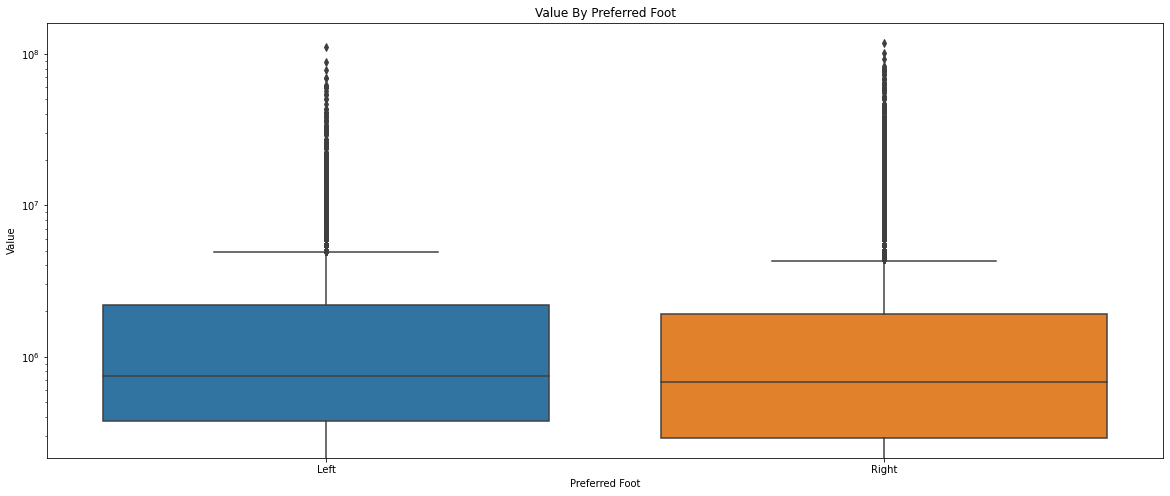

In [197]:
foot_p=data_fifa19_1.groupby('Preferred Foot')["Value"].size().sort_values(ascending=False)[:10].reset_index()['Preferred Foot']
#countries
plt.figure(figsize=(20,8))
graph1=sns.boxplot(y=data_fifa19_1[data_fifa19_1["Preferred Foot"].isin(foot_p)]["Value"], x=data_fifa19_1[data_fifa19_1["Preferred Foot"].isin(foot_p)]["Preferred Foot"])
graph1.set(yscale="log", title="Value By Preferred Foot");

Observamos que la preferencia con la pierna con la que domina el juego, no es muy relevante en el precio del jugador. Aunque es evidente un sesgo superior sobre los surdos.

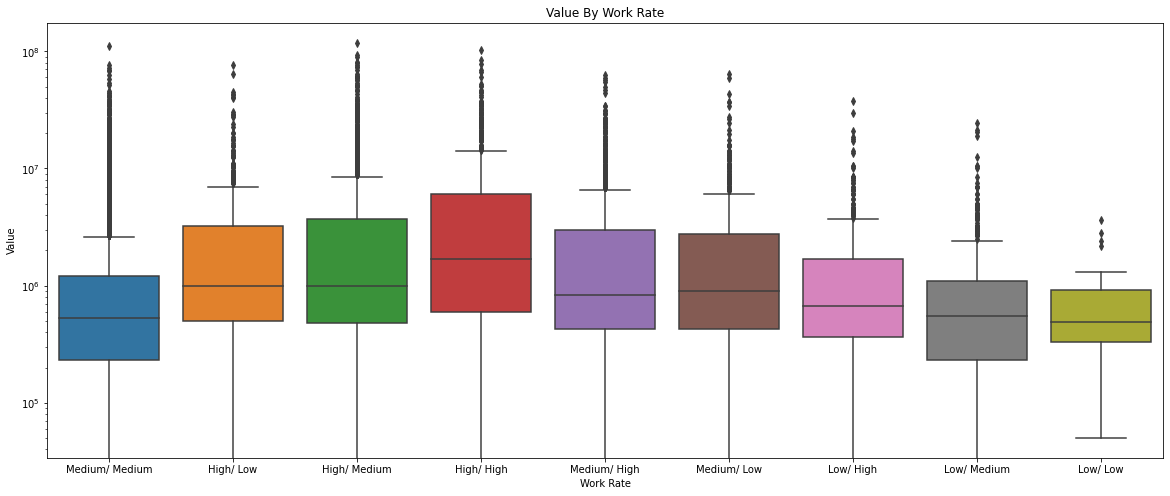

In [199]:
work_r=data_fifa19_1.groupby('Work Rate')["Value"].size().sort_values(ascending=False).reset_index()['Work Rate']
#countries
plt.figure(figsize=(20,8))
graph1=sns.boxplot(y=data_fifa19_1[data_fifa19_1["Work Rate"].isin(work_r)]["Value"], x=data_fifa19_1[data_fifa19_1["Work Rate"].isin(work_r)]["Work Rate"])
graph1.set(yscale="log", title="Value By Work Rate");

Claramente evidenciamos que su ritmo o desempeño es vital para su valoracion. En la gráfica de destacan las cualidades de High/High Medium/High High/Medium que dan valor al jugador

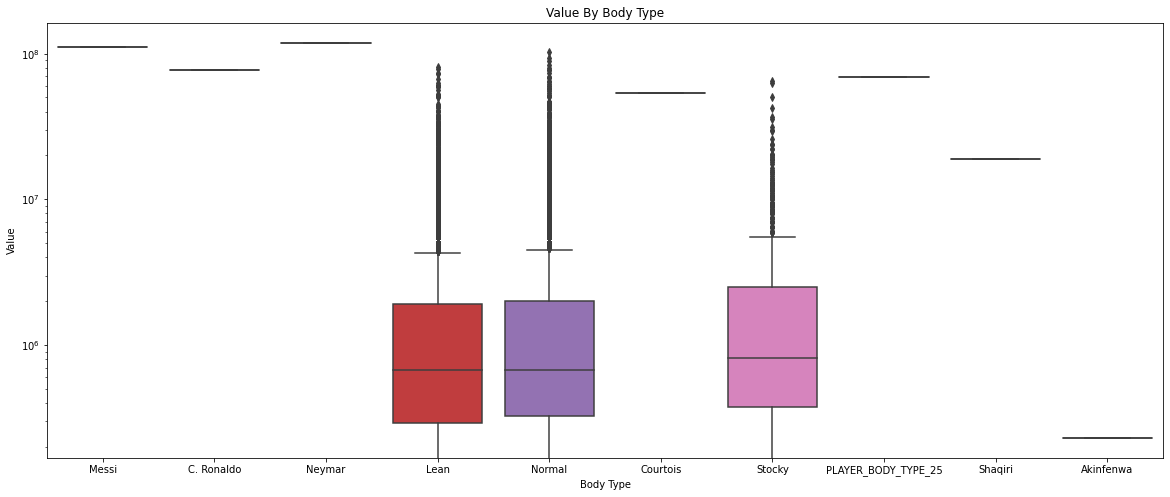

In [200]:
body_t=data_fifa19_1.groupby('Body Type')["Value"].size().sort_values(ascending=False).reset_index()['Body Type']
#countries
plt.figure(figsize=(20,8))
graph1=sns.boxplot(y=data_fifa19_1[data_fifa19_1["Body Type"].isin(body_t)]["Value"], x=data_fifa19_1[data_fifa19_1["Body Type"].isin(body_t)]["Body Type"])
graph1.set(yscale="log", title="Value By Body Type");

La estructura fisica se estandarizo al parecer con la de los mejores jugadores del mundo hasta el momento, con esta metrica se puede concluir que los jugadores mas parecidos a este tipo de patron de medida son los que tienen un valor agregado en el mercado del futbol

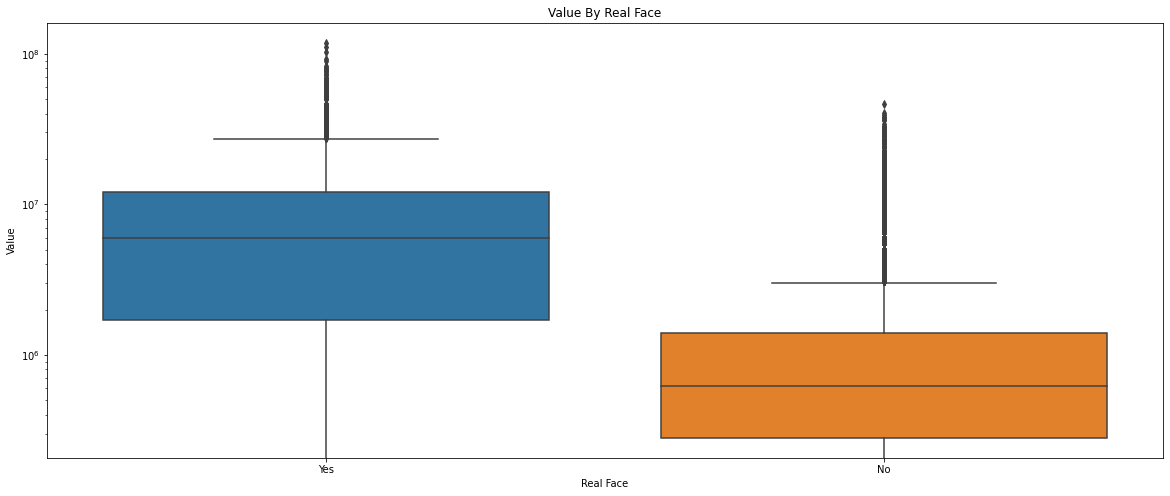

In [201]:
real_f=data_fifa19_1.groupby('Real Face')["Value"].size().sort_values(ascending=False).reset_index()['Real Face']
#countries
plt.figure(figsize=(20,8))
graph1=sns.boxplot(y=data_fifa19_1[data_fifa19_1["Real Face"].isin(real_f)]["Value"], x=data_fifa19_1[data_fifa19_1["Real Face"].isin(real_f)]["Real Face"])
graph1.set(yscale="log", title="Value By Real Face");

Esta metrica es diferenciadora en el valor del jugador, pero exactamente parece un indicador orientado a la realidad virtual, por lo tanto lo descartaremos.

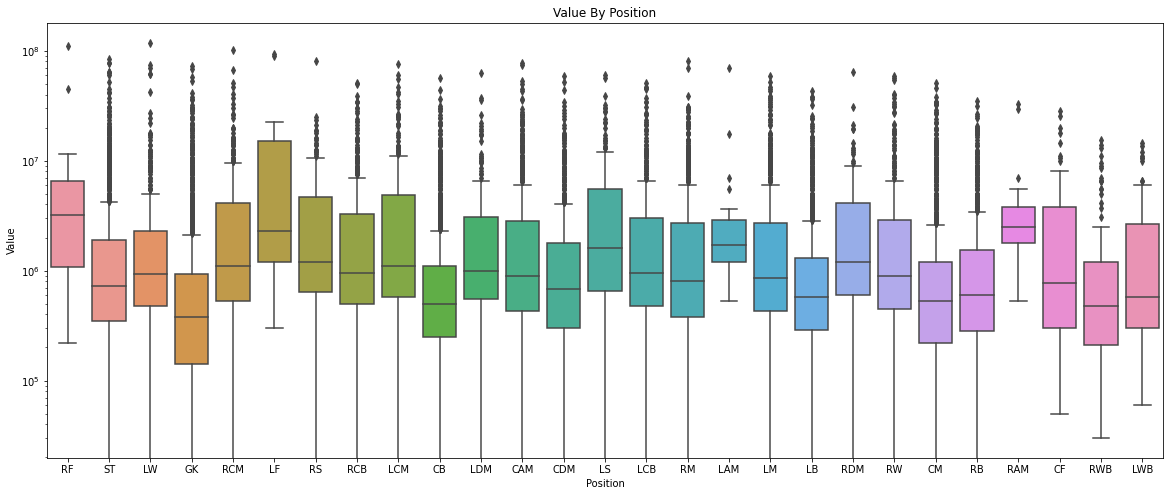

In [202]:
pos=data_fifa19_1.groupby('Position')["Value"].size().sort_values(ascending=False).reset_index()['Position']
#countries
plt.figure(figsize=(20,8))
graph1=sns.boxplot(y=data_fifa19_1[data_fifa19_1["Position"].isin(pos)]["Value"], x=data_fifa19_1[data_fifa19_1["Position"].isin(pos)]["Position"])
graph1.set(yscale="log", title="Value By Position");

Las posiciones mas destacadas son RF y LF

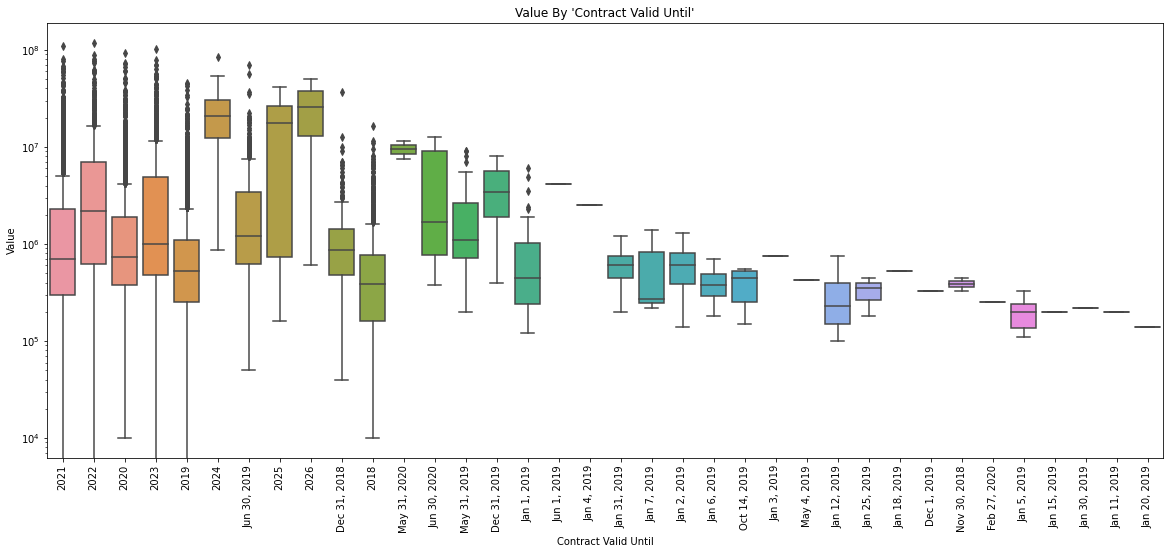

In [206]:
contr=data_fifa19_1.groupby('Contract Valid Until')["Value"].size().sort_values(ascending=False).reset_index()['Contract Valid Until']
#countries
plt.figure(figsize=(20,8))
graph1=sns.boxplot(y=data_fifa19_1[data_fifa19_1['Contract Valid Until'].isin(contr)]["Value"], x=data_fifa19_1[data_fifa19_1['Contract Valid Until'].isin(contr)]['Contract Valid Until'])
plt.xticks(rotation=90)
graph1.set(yscale="log", title="Value By 'Contract Valid Until'");

El valor del jugador es mayor cuando su contrato esta relacionado con la cantidad de tiempo que durara su contrato, observamos que en 2025 el valor de venta es mayor.

## Análisis de las variables Cuantitativas con respecto al valor del jugador


En este caso, por tratarse de este tipo de variables, realizaremos una matriz de correlación para entender, cual de estas variables esta más relacionada con el valor de un jugador, cabe aclarar, que estas variables son caracteristicas físicas y habilidades del jugador.

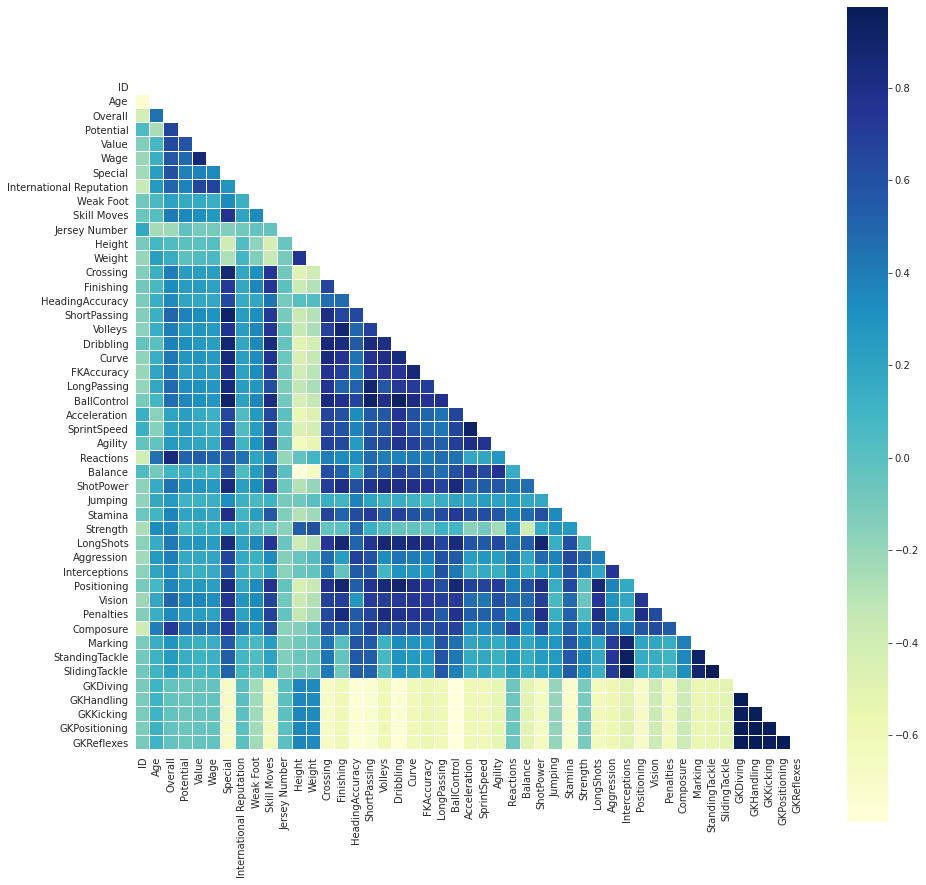

In [229]:
corr=data_fifa19_1[var_col_numeric].corr()
matrix=np.triu(corr)
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=matrix,square=True,linewidths=.10,cmap="YlGnBu", annot=False)

Como se logra distinguir las caracteristicas más influyentes son: Composure, Reactions, International Reputation, Wage. Las siguientes serian la vision, longshots, shotpower, BallControl, LongPassing, FCAaccuarcy, curve, dribbling, volley, shortpassing, skillmoves, special y las bajas contariamos Agression, Accelaration, Agility, Penalties, SpringSpeed.

In [237]:
feature_abil_value=["Composure", "Reactions", "International Reputation", "Wage", "Vision", "LongShots", "ShotPower", "BallControl", "LongPassing", "FKAccuracy", "Curve", "Dribbling","Volleys","ShortPassing","Skill Moves", "Aggression", "Acceleration","Agility","Penalties","SprintSpeed"]
data_fifa19_1[feature_abil_value].describe().T

,count,mean,std,min,25%,50%,75%,max
Composure,18159.0,58.648274,11.436133,3.0,51.0,60.0,67.0,96.0
Reactions,18159.0,61.836610,9.010464,21.0,56.0,62.0,68.0,96.0
International Reputation,18159.0,1.113222,0.394031,1.0,1.0,1.0,1.0,5.0
Wage,18159.0,9752.574481,22024.397597,0.0,1000.0,3000.0,9000.0,565000.0
Vision,18159.0,53.400903,14.146881,10.0,44.0,55.0,64.0,94.0
LongShots,18159.0,47.109973,19.260524,3.0,33.0,51.0,62.0,94.0
ShotPower,18159.0,55.460047,17.237958,2.0,45.0,59.0,68.0,95.0
BallControl,18159.0,58.369459,16.686595,5.0,54.0,63.0,69.0,96.0
LongPassing,18159.0,52.711933,15.327870,9.0,43.0,56.0,64.0,93.0
FKAccuracy,18159.0,42.863153,17.478763,3.0,31.0,41.0,57.0,94.0


In [239]:
features_total=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
data_fifa19_1[features_total].describe().T

,count,mean,std,min,25%,50%,75%,max
Crossing,18159.0,49.734181,18.364524,5.0,38.0,54.0,64.0,93.0
Finishing,18159.0,45.550911,19.525820,2.0,30.0,49.0,62.0,95.0
HeadingAccuracy,18159.0,52.298144,17.379909,4.0,44.0,56.0,64.0,94.0
ShortPassing,18159.0,58.686712,14.699495,7.0,54.0,62.0,68.0,93.0
Volleys,18159.0,42.909026,17.694408,4.0,30.0,44.0,57.0,90.0
Dribbling,18159.0,55.371001,18.910371,4.0,49.0,61.0,68.0,97.0
Curve,18159.0,47.170824,18.395264,6.0,34.0,48.0,62.0,94.0
FKAccuracy,18159.0,42.863153,17.478763,3.0,31.0,41.0,57.0,94.0
LongPassing,18159.0,52.711933,15.327870,9.0,43.0,56.0,64.0,93.0
BallControl,18159.0,58.369459,16.686595,5.0,54.0,63.0,69.0,96.0


Concluyendo que las caracteristicas y habilidades no tienen un peso significativo en la evaluacion del valor del jugador, tomaremos un rango de destreza entre 60% - 80%  para cada habilidad y clasificaremos a los jugadores que se encuentren ahí y que no tengan un valor de compra elevado.

In [252]:
name_players=[]
for feat in features_total:
    #print(feat)
    for i, var in enumerate(data_fifa19_1[feat]):
        #print(var)
        if var >= 60 and var <=90:
           name_players.append(i)

In [257]:
index_players=pd.DataFrame({"index":name_players})

In [259]:
index_players.drop_duplicates(keep="first")

,index
0,0
1,1
2,2
3,5
4,6
...,...
254563,16896
254565,16978
254566,16987
254567,17022


In [268]:
index_p=list(index_players["index"].unique())
data_fifa19_1.iloc[index_p,1]

0                 L. Messi
1        Cristiano Ronaldo
2                Neymar Jr
5                E. Hazard
6                L. Modrić
               ...        
16944     L. Ashby-Hammond
17026          J. Tibbetts
17035            A. Fisher
17070               Taliby
17476             N. Mantl
Name: Name, Length: 18038, dtype: object

Ya tenemos a los jugadores que estan en nuestro rango de interes, ahora con respecto a su valor, cual de estos estan por debajo del 25% de la estadistica que realizamos al inicio acerca del Valor, lo cual nos arrojaba que era de 300000(Euros)

In [287]:
r=list(data_fifa19_1.iloc[index_p,1])
data_players=data_fifa19_1[data_fifa19_1["Name"].isin(r)]
data_players=data_players[data_players["Value"]<=300000]
data_players

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
452,207439,L. Paredes,24,Argentina,80,85,NaN,0.0,0.0,2122,...,57.0,74.0,73.0,75.0,72.0,9.0,14.0,6.0,9.0,10.0
538,156713,A. Granqvist,33,Sweden,80,80,NaN,0.0,0.0,1797,...,79.0,78.0,82.0,83.0,79.0,7.0,9.0,12.0,10.0,15.0
568,229909,A. Lunev,26,Russia,79,81,NaN,0.0,0.0,1217,...,15.0,69.0,18.0,20.0,12.0,80.0,73.0,65.0,77.0,85.0
677,187347,I. Smolnikov,29,Russia,79,79,NaN,0.0,0.0,2038,...,41.0,73.0,76.0,76.0,80.0,7.0,12.0,10.0,8.0,15.0
864,153260,Hilton,40,Brazil,78,78,Montpellier HSC,0.0,18000.0,1807,...,64.0,70.0,83.0,77.0,76.0,12.0,7.0,11.0,12.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60000.0,1000.0,1307,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60000.0,1000.0,1098,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,60000.0,1000.0,1189,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60000.0,1000.0,1228,...,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


Y la tabla anterior nos indicaria los jugadores subvalorados con grandes potencialidades como deportistas

## Construcción del Modelo de Machine Learning

Construiremos nuestro modelo apartir de las caracteristicas del mapa de correlaciones generado anteriormente y almacenada en un arreglo llamado feature_abil_value. Tomaremos como referencia de modelo el arbol de decisiones y arboles aleatorios, y veremos cual es más optimo para nuestro caso, comparando el error de valor absoluto medio MAE (La diferencia entre los valores reales y los predichos).

In [293]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

#variable objetivo
y=data_fifa19_1["Value"]

#Variables caracteristicas
x=data_fifa19_1[feature_abil_value]

#datos de entrenamiento y validacion, colocamos como semilla o random_state =1 
#para que los valores se mantengan en cada interpretacion del programa
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=1)

#Especificamos el modelo
value_player_model=DecisionTreeRegressor(random_state=1)

#optimizamos con los datos de entrenamiento
value_player_model.fit(train_x, train_y)

#obtenemos la primera prediccion
predic1=value_player_model.predict(val_x)
val_mae1=mean_absolute_error(predic1,val_y)
print("El valor MAE1 es: ",val_mae1)

#Buscamos la mejor opción de hojas o nodo de nuestro arbol para cuidarnos del desajuste y sobreajuste
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
def get_mae(max_leaf_nodes, train_x, val_x, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_x, train_y)
    preds_val = model.predict(val_x)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

range_1={}
for max_leaf_nodes in candidate_max_leaf_nodes:
    my_mae= get_mae(max_leaf_nodes, train_x, val_x, train_y, val_y)
    range_1[max_leaf_nodes]=my_mae
    #print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
best_tree_size = min(range_1, key=range_1.get)
print("La mejor cantidad de nodes para el tamaño de mis dataset es:",best_tree_size)

El valor MAE1 es:  1138562.7753303964
La mejor cantidad de nodes para el tamaño de mis dataset es: 250


In [294]:
#usamos el mejor nodo que encontramos anteriormente
value_player_model2=DecisionTreeRegressor(max_leaf_nodes=250,random_state=1)
value_player_model2.fit(train_x,train_y)
predic2=value_player_model2.predict(val_x)
val_mae2=mean_absolute_error(predic2, val_y)
print("El valor MAE2 es: ",val_mae2)

El valor MAE2 es:  1013541.1117788058


In [296]:
#Ahora vamos con el arbol aleatorio
from sklearn.ensemble import RandomForestRegressor

#definimos el modelo
value_player_rf=RandomForestRegressor(random_state=1)
#optimizamos el modelo
value_player_rf.fit(train_x, train_y)
#calculamos mae3
predic3=value_player_rf.predict(val_x)
mae3=mean_absolute_error(predic3, val_y)
print("El valor MAE3 es: ",mae3)

El valor MAE3 es:  786133.2599118942


In [305]:
#validacion:
#utilizo las caracteristicas de mis jugadores subvalorados
predic_player=value_player_rf.predict(data_players[feature_abil_value])
values_predict_players=pd.DataFrame({"Name":data_players["Name"], "Value_predict":predic_player, "Value0":data_players["Value"]})
values_predict_players

,Name,Value_predict,Value0
452,L. Paredes,2814000.0,0.0
538,A. Granqvist,1087200.0,0.0
568,A. Lunev,805950.0,0.0
677,I. Smolnikov,1840000.0,0.0
864,Hilton,1221500.0,0.0
...,...,...,...
18202,J. Lundstram,87450.0,60000.0
18203,N. Christoffersson,81050.0,60000.0
18204,B. Worman,65700.0,60000.0
18205,D. Walker-Rice,76450.0,60000.0


En la anterior tabla observamos el primer valor del jugador (Value0) y su predicción (Value_predict)

## Conclusiones

Recomendación: Estos jugadores son subvalorados, porque no tienen una reputacion y/o perteneces algún Club recocnocido, pero en características físicas como en habilidades prometen y se comparan con las grandes estrellas del deporte. Con una buena posicion en el campo según sus habilidades más fuertes puede llegar a promocionarse por si mismo. Dentro de unos años sus destrezas serán muy bien evaluadas económicamente

Se generaron tres modelos, de los cuales el que es menos propenso al error, es el de arboles aleatorios. Su algoritmo a diferencia del arbol de decisión no esta tan sujeto a una clasificacion tan delicada de los patrones que pueden llegar a tener los datos, lo que hace mas eficiente y un poco menos perceptible a los desajustes o sobreajustes.

La limpieza de datos al inicio, facilito mucho el trabajo sobre machine learning, puesto que si se hubieran tomado naturalmente,  hubiera sido propenso a muchos inconvenientes

## Anderson Danilo Guerrero